In [1]:
from matplotlib import pyplot as plt
from glob import glob
import numpy as np
import h5py
import astropy.units as u
import matplotlib as mpl

In [2]:
mpl.rc_file('/home1/10071/alexescamilla2244/Mike_RCParams')

In [3]:
E_ff100_values = np.sort(glob("/work2/10071/alexescamilla2244/frontera/CASSI_Project-2024/output/E_FF100_values" + "/*.hdf5"))[:378]

In [4]:
E_ff500_values = np.sort(glob("/work2/10071/alexescamilla2244/frontera/CASSI_Project-2024/output/E_FF500_values" + "/*.hdf5"))[:378]

In [5]:
E_ff1000_values = np.sort(glob("/work2/10071/alexescamilla2244/frontera/CASSI_Project-2024/output/E_FF1000_values" + "/*.hdf5"))[:378]

In [6]:
all_snaps = np.sort(glob("/scratch3/03532/mgrudic/STARFORGE_RT/STARFORGE_v1.2/M2e4_R10_Z1_S0_A2_B0.1_I1_Res271_n2_sol0.5_42/output/" + "/*.hdf5"))[:378]

In [7]:
#all_snaps

In [8]:
our_snaps = []
for file in all_snaps:
    with h5py.File(file, "r") as F:
        if "PartType5/Coordinates" in F.keys():
            our_snaps.append(file)
            

In [9]:
#our_snaps

In [10]:
def time_sim(snapshots):
    simulation_times = []
    for snapshot in snapshots:
        time = (h5py.File(str(snapshot))["Header"].attrs["Time"] * u.pc / (u.meter/u.second)).to(u.Myr)
        simulation_times.append(time.value)
    return np.float32(np.sort(simulation_times))

In [11]:
time_range = time_sim(our_snaps)

<ipython-input-10-4607c18e37bd>:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  time = (h5py.File(str(snapshot))["Header"].attrs["Time"] * u.pc / (u.meter/u.second)).to(u.Myr)


In [12]:
len(time_range)

333

In [13]:
def make_plots(file,snaps):

    E_FF =[]
    t = []
    for i,j in zip(file, snaps):
        time = (h5py.File(str(j), "r")["Header"].attrs["Time"] * u.pc / (u.meter/u.second)).to(u.Myr)
        with h5py.File(i, "r") as F:
            value = np.float32(F["SFE"][:])
            mask = (~np.isnan(value) & (value > 0))
            real = value[mask]
            if real.size > 0:
                E_FF.extend(real)
                t.append(time.value)
            else:
                continue
    return E_FF, t
           
    




In [14]:
EFF_100, t1 = make_plots(E_ff100_values, our_snaps)
EFF_500, t2 = make_plots(E_ff500_values, our_snaps)
EFF_1000, t3 = make_plots(E_ff1000_values, our_snaps)

In [15]:
new_t1 = np.sort(np.log10(t1))

In [16]:
len(EFF_100)

333

In [17]:
import matplotlib.pyplot as pl

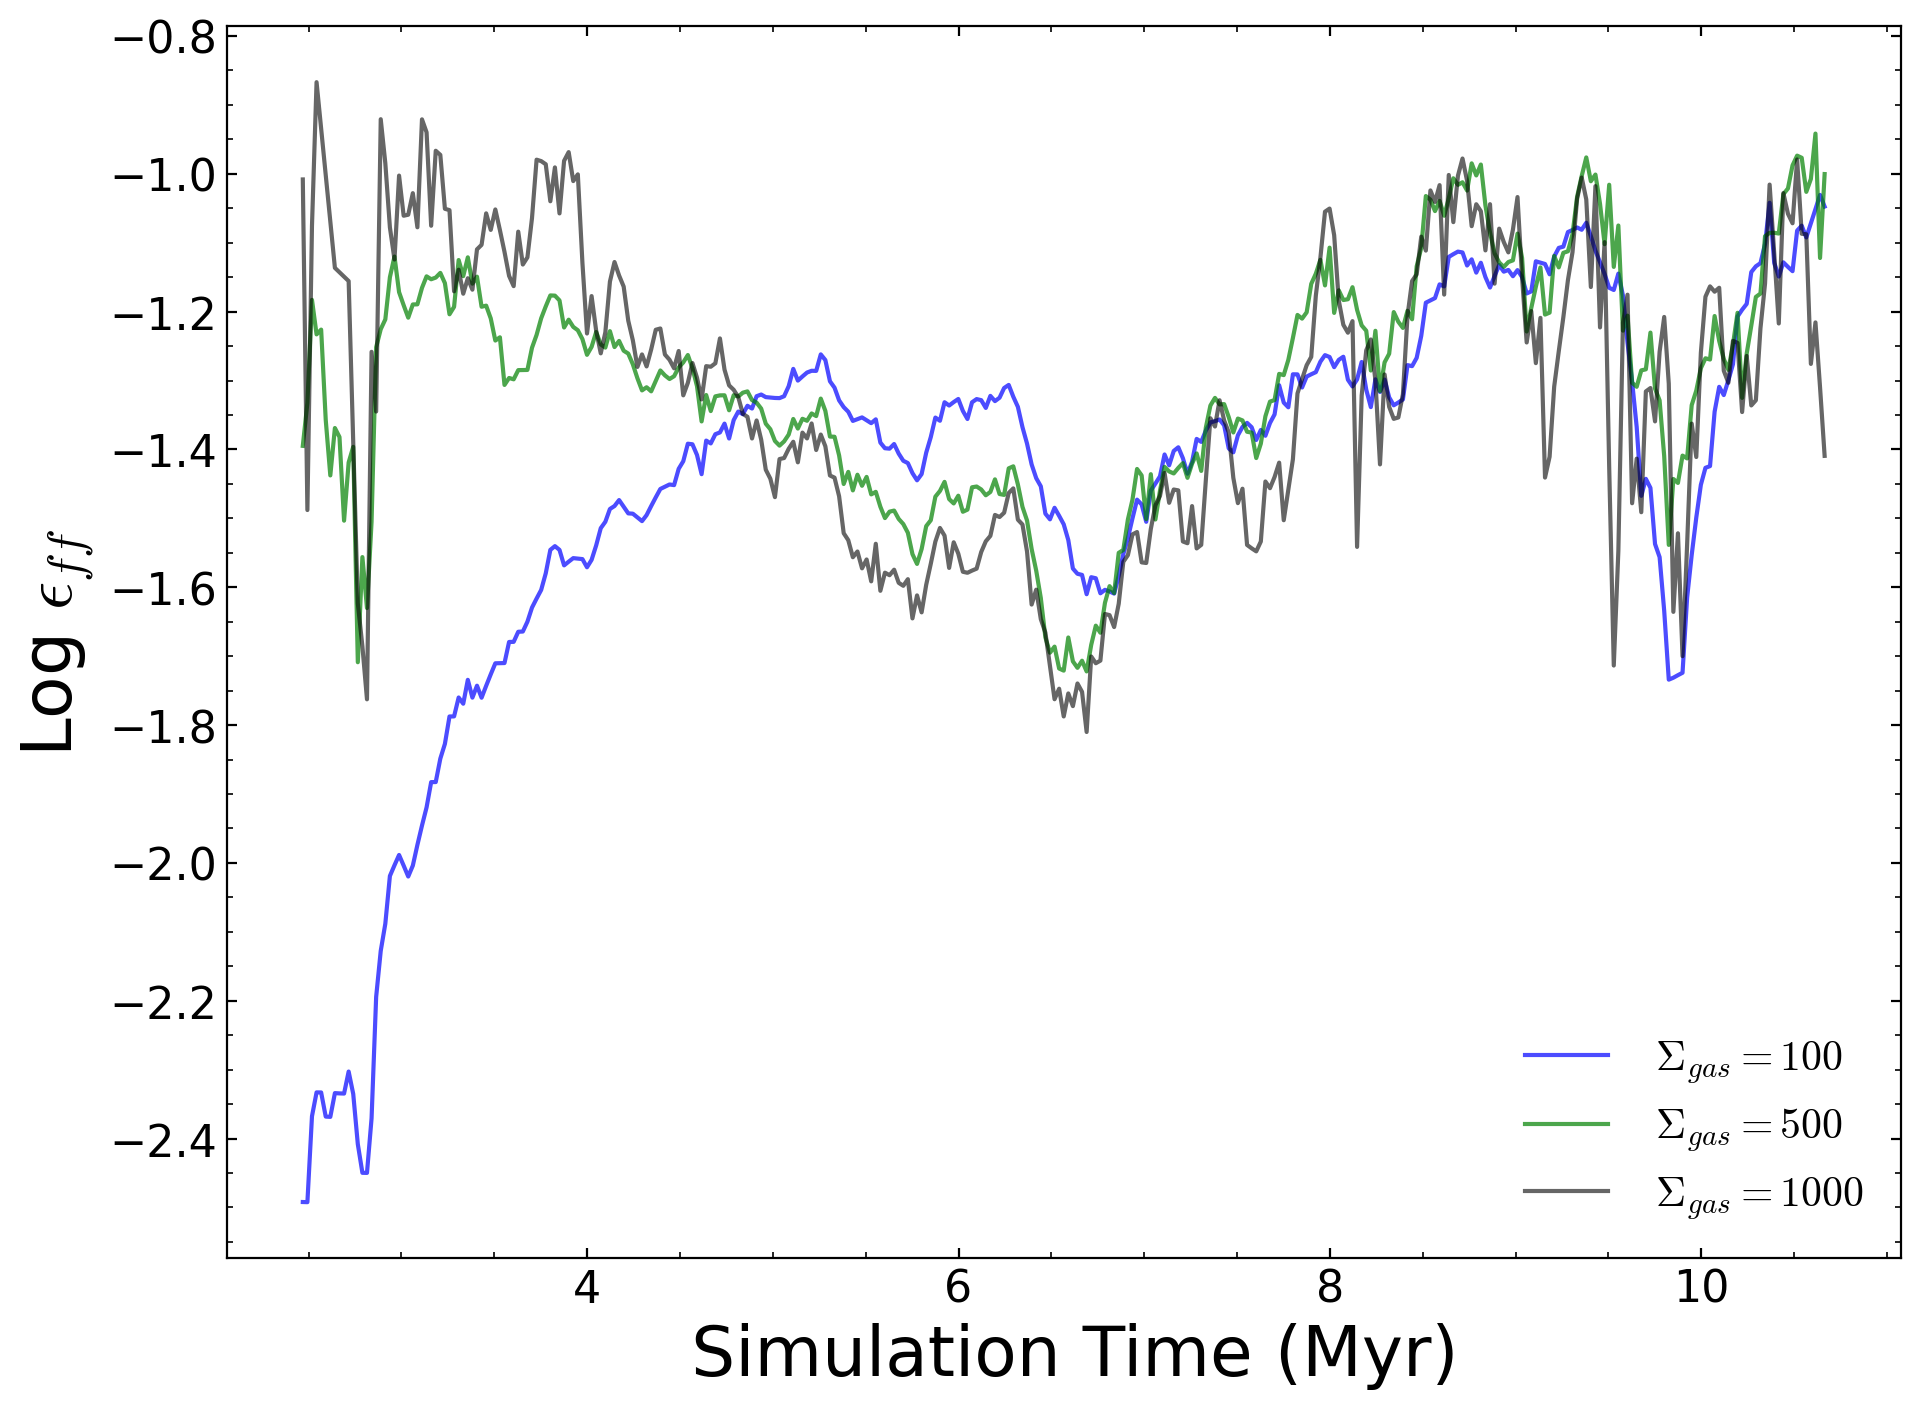

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t1,np.log10(EFF_100), label = r" $\Sigma_{gas} = 100 $", c='blue', alpha=0.7)
ax.plot(t2,np.log10(EFF_500), label = r" $\Sigma_{gas} = 500 $", c='green', alpha=0.7)
ax.plot(t3,np.log10(EFF_1000), label =  r" $\Sigma_{gas} = 1000 $", c='black', alpha=0.6)
ax.legend(fontsize=15)
ax.set_xlabel(r" Simulation Time (Myr)", fontsize= 25);
ax.set_ylabel(r"Log $\epsilon_{ff}$", fontsize=25);
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
#ax.set_title(r"Log $\epsilon_{ff}$ vs. t (Myr) at Different Cutoffs", fontsize=20);
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])


plt.savefig('test', facecolor='white', transparent=False)